
<div>
<center>
<h1><b>Introduction - Optimization techniques</b></h1>
<h2>Linear regression model</h2>
Andrés Herencia López-Menchero
</br></br>
<div>
<img src = 'https://www.ucm.es/file/logo-ucm/?ver', height = 100px >
<img src = 'https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo/LOGOTIPO%20color%20PNG.png', height = 100px>
</div>
</div>
<br/>

## Reading data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TOPT/data/ppm_counts_per_min_squared.csv', sep=';')
df

,ppm,counts/min^2
0,0.02,76
1,0.02,47
2,0.06,97
3,0.06,107
4,0.11,123
5,0.11,139
6,0.22,159
7,0.22,152
8,0.56,191
9,0.56,201


In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Preprocessing

In [5]:
# Preparing the dependent and independent variable
x = np.array(df['ppm']).reshape(-1,1)
y = np.array(df['counts/min^2'])

(array([[0.02],
        [0.02],
        [0.06],
        [0.06],
        [0.11],
        [0.11],
        [0.22],
        [0.22],
        [0.56],
        [0.56],
        [1.1 ],
        [1.1 ]]),
 array([ 76,  47,  97, 107, 123, 139, 159, 152, 191, 201, 207, 200]))

## Creating the model

In [7]:
reg = LinearRegression().fit(x, y)
reg

LinearRegression()

## Results
Getting coefficient of determination, interception and slope of the linear regression model.

In [11]:
r_sq = reg.score(x, y)
print(f"coefficient of determination: {round(r_sq*100,2)}%")

coefficient of determination: 69.06%


In [16]:
print(f"intercept: {reg.intercept_}")
print(f"slope: {float(reg.coef_)}")

intercept: 103.48806186471386
slope: 110.42107672063618


## Predicting new values

In [20]:
y_pred = reg.predict(x)
y_pred

array([105.6964834 , 105.6964834 , 110.11332647, 110.11332647,
       115.6343803 , 115.6343803 , 127.78069874, 127.78069874,
       165.32386483, 165.32386483, 224.95124626, 224.95124626])

## Error
Computing the error between the predicted values previously computed by the linear regresion model and the actual values that we passed as input to obtain the model.

In [29]:
mse_abs = np.sqrt(np.mean((y_pred-y)**2))
mse_rel = np.mean(np.abs(y-y_pred)/y)
print(f'Mean squared error (in absolute terms): ',round(mse_abs,2))
print(f'Relative error (%): ',round(mse_rel*100,2))

Mean squared error (in absolute terms):  28.21
Relative error (%):  24.26


## Plot

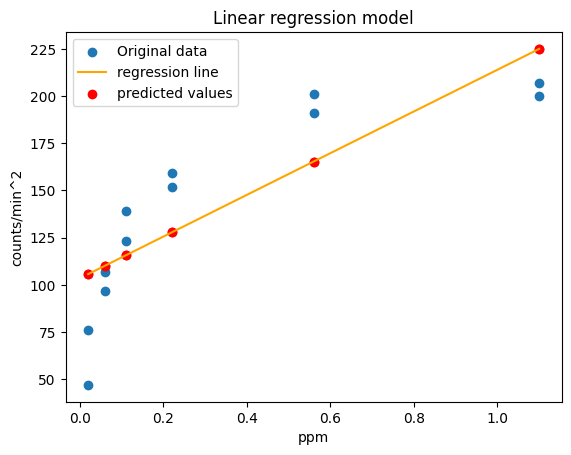

In [76]:
plt.scatter(x, y, label = 'Original data')
plt.title('Linear regression model')
plt.xlabel('ppm')
plt.ylabel('counts/min^2')
plt.plot(x, y_pred, color = 'orange', label = 'regression line')
plt.scatter(x, y_pred, color='red', label = 'predicted values')
plt.legend()
plt.show()